In [1]:
import stripy as stripy
import numpy as np

In [2]:
# Vertices of an icosahedron as Lat / Lon in degrees

vertices_LatLonDeg = np.array(
                               [[ 90,         0.0 ],
                                [ 26.57,      0.0 ],
                                [-26.57,     36.0 ],
                                [ 26.57,     72.0 ],
                                [-26.57,    108.0 ],
                                [ 26.57,    144.0 ],
                                [-26.57,    180.0 ],
                                [ 26.57,    360.0-72.0 ],
                                [-26.57,    360.0-36.0 ],
                                [ 26.57,    360.0-144.0 ],
                                [-26.57,    360.0-108.0 ],
                                [-90,         0.0 ]])

In [3]:
vertices_lat = np.radians(vertices_LatLonDeg.T[0])
vertices_lon = np.radians(vertices_LatLonDeg.T[1])

In [4]:
spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat)

In [5]:
spherical_triangulation

In [6]:
print(spherical_triangulation.areas())
print(spherical_triangulation.npoints)

[0.628217   0.628217   0.628217   0.628217   0.628217   0.62842006
 0.62842006 0.62842006 0.628217   0.628217   0.62842006 0.62842006
 0.628217   0.62842006 0.62842006 0.628217   0.62842006 0.62842006
 0.62842006 0.628217  ]
12


In [7]:
refined_spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat, refinement_levels=2)

print(refined_spherical_triangulation.npoints)
#print(refined_spherical_triangulation.areas())

162


In [8]:
%matplotlib inline

from osgeo import gdal
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


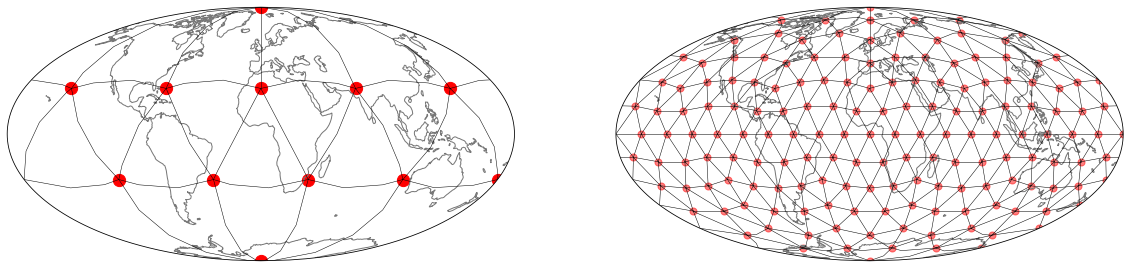

In [11]:
fig = plt.figure(figsize=(20, 10), facecolor="none")
    
ax  = plt.subplot(121, projection=ccrs.Mollweide(central_longitude=0.0, globe=None))
ax.coastlines(color="#777777")
ax.set_global()

ax2 = plt.subplot(122, projection=ccrs.Mollweide(central_longitude=0.0,  globe=None))
ax2.coastlines(color="#777777")
ax2.set_global()

## Plot the vertices and the edges for the original isocahedron

lons = np.degrees(spherical_triangulation.lons)
lats = np.degrees(spherical_triangulation.lats)

ax.scatter(lons, lats, color="Red",
                 marker="o", s=150.0, transform=ccrs.PlateCarree())

segs = spherical_triangulation.identify_segments()

for s1, s2 in segs:
    ax.plot( [lons[s1], lons[s2]],
             [lats[s1], lats[s2]], 
              linewidth=0.5, color="black", transform=ccrs.Geodetic())
    
## Plot the vertices and the edges for the refined isocahedron

lons = np.degrees(refined_spherical_triangulation.lons)
lats = np.degrees(refined_spherical_triangulation.lats)

ax2.scatter(lons, lats, color="Red", alpha=0.5,
                 marker="o", s=50.0, transform=ccrs.PlateCarree())


segs = refined_spherical_triangulation.identify_segments()

for s1, s2 in segs:
    ax2.plot( [lons[s1], lons[s2]],
              [lats[s1], lats[s2]], 
              linewidth=0.5, color="black", transform=ccrs.Geodetic())